# Steam Game Dataset Analysis

## Introduction

This is a practice dataset analysis pilot project for my High School Computer Science course. Throughout this notebook, I'll be using Steam Store data that was scraped and uploaded onto Kaggle. In the future, I'll likely do another trial by scraping and cleaning out my own data.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

Now, the data that'll be used for the purpose of this notebook has already been scraped from the internet and is stored on my repository. Unfortunately, GitHub limits files to 50 MB. The json data files had to be split into different chunks in order to fit. In order to analyze them with pandas, they need to be formed back into one dataframe.

(The JSONs were downloaded and split using the file titled 'scrapedata.py'. It's available on the repo if needed.)

In [4]:
# read the split json files and concatenate them
json_files = [f'https://raw.githubusercontent.com/1metropolis/steam-analysis/refs/heads/main/data/data_{i}.json' for i in range(1, 17)]
dfs = [pd.read_json(file, orient='index') for file in json_files]

df = pd.concat(dfs)

Each entry is identifiable by the game_id located in the leftmost column. The following attributes are available for each game entry:

In [5]:
print("game count:",len(df))
print(df.columns)

game count: 111452
Index(['name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'discount'],
      dtype='object')


We can use this information to analyze different statistics and trends.

## Cleaning Data

The data includes the dates that each game was released:

In [6]:
df.release_date.head()

20200      Oct 21, 2008
655370     Oct 12, 2017
1732930    Nov 17, 2021
1355720    Jul 23, 2020
1139950     Feb 3, 2020
Name: release_date, dtype: object

Dates like, "Oct 21, 2008" aren't exactly to play around with in Pandas. Let's convert it to a more standardized date format.

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

At the time of writing, the year 2025 hasn't ended, so game data will probably be incomplete. So we can also drop games released in 2025 for now.

In [8]:
games_2025 = df[df['release_date'].dt.year == 2025].index

df = df.drop(games_2025)

We can also extract the year for each game to make it easier to count up annual releases later on.

In [9]:
df['year'] = df['release_date'].dt.year

## Modification

## Analysis

### How many games?

The Video Game Industry has grown tremendously in the past 20 years. Let's take a look at how many games have been released annually. 

In [10]:
annual_releases = df['release_date'].dt.year.value_counts().sort_index()
annual_releases

release_date
1997.0        2
1998.0        1
1999.0        3
2000.0        2
2001.0        4
2002.0        1
2003.0        3
2004.0        7
2005.0        7
2006.0       69
2007.0      109
2008.0      176
2009.0      339
2010.0      300
2011.0      286
2012.0      356
2013.0      490
2014.0     1627
2015.0     2683
2016.0     4407
2017.0     6324
2018.0     8166
2019.0     7810
2020.0     9631
2021.0    12376
2022.0    13979
2023.0    15543
2024.0    20583
Name: count, dtype: int64

We can graph the amount over time as well.

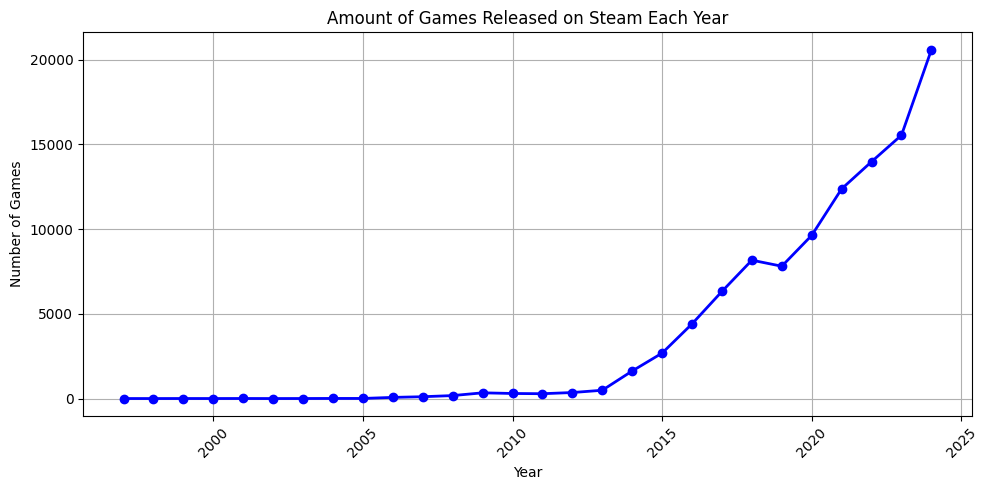

In [11]:
fig = plt.figure(figsize=(10,5))
sg = fig.add_subplot()

sg.plot(annual_releases.index, annual_releases.values, 'bo-', linewidth=2)

sg.set_title('Amount of Games Released on Steam Each Year')
sg.set_xlabel('Year')
sg.set_ylabel('Number of Games')
sg.grid(True)

plt.xticks(rotation=45) # looks cooler
plt.tight_layout()
plt.show()

Game releases on Steam appear to have especially skyrocketed in recent years, this can likely be attributed to the fact that the popularity Video Gaming increased greatly during the pandemic.

### Indie vs. Non-Indie

Let's take a quick look at what kinds of games are included in the dataset.

Here are some tags that Steam users assigned to different games:

In [12]:
unique_genres = set(
    genre
    for genres_list in df['genres']
    if isinstance(genres_list, list)
    for genre in genres_list
)

print(unique_genres)

{'Free To Play', 'RPG', 'Photo Editing', 'Sports', 'Movie', 'Education', 'Video Production', 'Adventure', 'Racing', 'Tutorial', '360 Video', 'Action', 'Nudity', 'Massively Multiplayer', 'Episodic', 'Software Training', 'Utilities', 'Web Publishing', 'Violent', 'Gore', 'Sexual Content', 'Strategy', 'Early Access', 'Design & Illustration', 'Indie', 'Animation & Modeling', 'Audio Production', 'Short', 'Documentary', 'Accounting', 'Game Development', 'Free to Play', 'Casual', 'Simulation'}


Looks like there's a category called Indie. Let's take a look at how the indie game development scene has changed over the years.

Here's some of the indie games included in the dataset:

In [13]:
indie_games = df[df['tags'].apply(lambda x: isinstance(x, dict) and 'Indie' in x)]
indie_games

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount,year
20200,Galactic Bowling,2008-10-21,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",NaN,2008.0
655370,Train Bandit,2017-10-12,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",NaN,2017.0
1355720,Henosis™,2020-07-23,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",NaN,2020.0
1139950,Two Weeks in Painland,2020-02-03,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",NaN,2020.0
320150,Deadlings: Rotten Edition,2014-11-11,0,3.99,0,Death is lonely. He has zero friends on his Fa...,Death is lonely. He has zero friends on his Fa...,Arcade side-scroller with strategy elements! F...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,45,50000 - 100000,703,0,782,0,0,"{'Action': 27, 'Indie': 27, 'Adventure': 26, '...",NaN,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595940,Magical Bakery,2024-11-06,0,19.99,1,"Magical Bakery is a cooking and management, si...","Magical Bakery is a cooking and management, si...","Experience a life full of magic, challenges, a...",“Magical Bakery is an easy breezy cozy game th...,https://shared.akamai.steamstatic.com/store_it...,...,10,0 - 20000,0,0,0,0,0,"{'3D Platformer': 149, 'Farming Sim': 143, 'Ch...",0.0,2024.0
2736930,Ascend Factory,2024-12-23,0,6.99,0,Ascend Factory is a factory simulation game th...,Ascend Factory is a factory simulation game th...,"Welcome to Ascend Factory, a factory simulatio...",,https://shared.akamai.steamstatic.com/store_it...,...,1,0 - 20000,0,0,0,0,0,"{'Automation': 212, 'Strategy': 211, 'Puzzle':...",0.0,2024.0
3258910,Tank Blitz: Underdog Division,2024-12-25,0,9.99,0,Tank Blitz: is a retro-style 2D top-down tank...,Tank Blitz: is a retro-style 2D top-down tank...,Tank Blitz: is a retro-style 2D top-down tank...,,https://shared.akamai.steamstatic.com/store_it...,...,0,0 - 20000,0,0,0,0,0,"{'Action': 70, 'Arcade': 44, 'Shooter': 41, '2...",0.0,2024.0
3251510,Race or Crash: Secret Racer League,2024-10-28,0,4.99,0,Break through your rivals and destroy their ca...,Break through your rivals and destroy their ca...,"Race or Crash is a Combat-Racing game, where y...",,https://shared.akamai.steamstatic.com/store_it...,...,0,0 - 20000,0,0,0,0,0,"{'Racing': 71, 'Action': 59, 'Combat Racing': ...",0.0,2024.0


Here are games that aren't considered Indie. Not sure if theyre worthy of being called Triple-A games, or whether they're just mid-sized studios.

In [14]:
not_indie_games = df[df['tags'].apply(lambda x: isinstance(x, dict) and 'Indie' not in x)]
not_indie_games

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount,year
1469160,Wartune Reborn,2021-02-26,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,49,50000 - 100000,0,0,0,0,68,"{'Turn-Based Combat': 292, 'Massively Multipla...",NaN,2021.0
1659180,TD Worlds,2022-01-09,0,10.99,1,"TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...",,https://cdn.akamai.steamstatic.com/steam/apps/...,...,7,0 - 20000,0,0,0,0,3,"{'Tower Defense': 232, 'Rogue-lite': 226, 'RTS...",NaN,2022.0
1178150,MazM: Jekyll and Hyde,2020-04-02,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,'MazM: Jekyll and Hyde' is a darkly entertaini...,Players will experience the world through the ...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,6,0 - 20000,0,0,0,0,1,"{'Adventure': 53, 'Simulation': 50, 'RPG': 49,...",NaN,2020.0
1026420,WARSAW,2019-10-02,0,23.99,0,Summer deal that we recommend! SacriFire – the...,Use everything at your disposal to help a team...,WARSAW is a challenging turn-based tactical RP...,“New WW2 Strategy Game Offers A Harrowing Look...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,212,20000 - 50000,67,0,93,0,5,"{'Tactical RPG': 255, 'Turn-Based Strategy': 2...",NaN,2019.0
485000,Cthulhu Realms,2016-07-01,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,Star Realms has gone insane! Introducing Cthul...,Star Realms has gone insane! Introducing Cthul...,“The art in Cthulhu Realms is hilarious and be...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,58,50000 - 100000,224,0,257,0,0,"{'Card Game': 34, 'Strategy': 33, 'Deckbuildin...",NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210720,Harvest Village,2024-12-09,0,6.99,0,We designed Harvest Village to be the best cit...,We designed Harvest Village to be the best cit...,Harvest Village is a resource gathering and cr...,,https://shared.akamai.steamstatic.com/store_it...,...,4,0 - 20000,0,0,0,0,0,"{'Building': 294, 'Medieval': 289, 'Resource M...",0.0,2024.0
2962550,Glitch World,2024-12-04,0,1.99,0,Glitchworld is a retro-platform-shooter where ...,Glitchworld is a retro-platform-shooter where ...,Glitch World is a retro-platform-shooter where...,,https://shared.akamai.steamstatic.com/store_it...,...,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 392, 'Runner': 386, 'Shoot '...",0.0,2024.0
3256870,Viravius Shooter,2024-11-16,0,1.99,0,"In 2084, the rise of sentient artificial intel...","In 2084, the rise of sentient artificial intel...",A sentient AI in 2084 faces a hacking adventur...,,https://shared.akamai.steamstatic.com/store_it...,...,0,0 - 20000,0,0,0,0,0,"{'Side Scroller': 252, 'Shoot 'Em Up': 247, 'P...",0.0,2024.0
3261010,East Trade Tycoon: Inheritance,2024-10-21,0,2.99,0,Eastern Trade Tycoon: Inheritance is a simulat...,Eastern Trade Tycoon: Inheritance is a simulat...,Eastern Trade Tycoon: Inheritance is a trading...,,https://shared.akamai.steamstatic.com/store_it...,...,113,100000 - 200000,0,0,0,0,88,"{'Casual': 200, 'Simulation': 198, 'Trading': ...",0.0,2024.0


Looks like there's quite a few indie_games available on the Steam Storefront. But how popular have indie games become compared to games that are considered "non-indie"?

To find out, let's create a separate column called is_indie to indicate whether a game has the "indie" value in its genre category and separate the two types of games.

In [15]:
df['is_indie'] = df['genres'].apply(lambda genres: 'Indie' in genres)

We can also use this code to calculate the number of indie (or non-indie) games that were released each year.

In [17]:
release_counts = df.groupby(['year', 'is_indie']).size().unstack(fill_value=0)
release_counts.head

<bound method NDFrame.head of is_indie  False  True 
year                  
1997.0        0      2
1998.0        1      0
1999.0        3      0
2000.0        2      0
2001.0        3      1
2002.0        1      0
2003.0        1      2
2004.0        7      0
2005.0        4      3
2006.0       58     11
2007.0      101      8
2008.0      150     26
2009.0      273     66
2010.0      232     68
2011.0      178    108
2012.0      182    174
2013.0      215    275
2014.0      712    915
2015.0      751   1932
2016.0     1318   3089
2017.0     1851   4473
2018.0     1959   6207
2019.0     1901   5909
2020.0     2499   7132
2021.0     4202   8174
2022.0     5256   8723
2023.0     6163   9380
2024.0     7864  12719>

We've got a proper headcount for how many indie games there are each year, but what share of those games released are Indie?

We can use this code to calculate the proportion of indie and non-indie games released each year by dividing the yearly counts by the total number of games for that year. 

In [132]:
indie_share = release_counts.div(release_counts.sum(axis=1), axis=0)
indie_share = indie_share.iloc[:, [1, 0]]  # switch the order so indie games appear on the bottom on the chart

Lastly, we can graph.

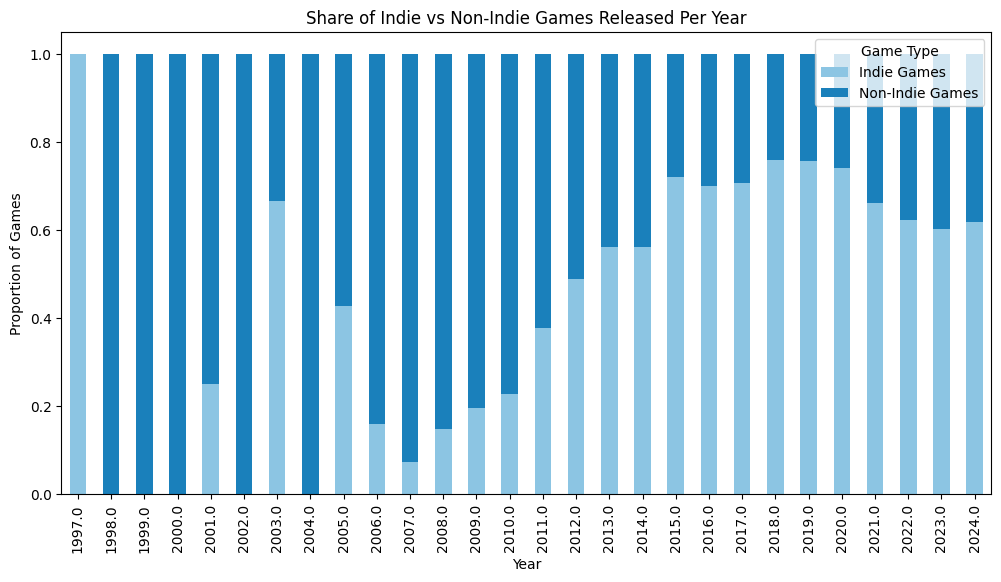

In [133]:
indie_share.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#8cc5e3','#1a80bb'])
plt.title('Share of Indie vs Non-Indie Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Games')
plt.legend(title='Game Type', labels=['Indie Games', 'Non-Indie Games'], loc='upper right')
plt.show()

Although Indie games appear to have been the most common game released in 1997, it appears as though large studio games have been largely dominant until about 2011, with 2003 as an indie-outlier. Steam as a platform was released in 2003, so the availability of a new platform could've motivated some developers to attempt to release their games on the platform.

Indie games appear to had increased in popularity starting roughly in 2011, likely due to the accessibility of game development tools and the increasing viability of self-publishing. By 2015, indie games had become the majority of releases on the platform. Indie game market share does seems to have plateaued around 2015 at around 60%, however, though the increasing amount of total game releases does indicate that indie games and studio games have both been increasing in release count-- both genres of games have remained popular.